$$
Final\space Exam:Due\space Monday,\space May \space 13th \\
Steven \space Green \\
817121481 \\
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as math
%matplotlib inline

Problem 1 (20 pts) There are many methods for finding numerical solutions to differential equations of the form $y'=f(x,y)$, an example is the following formula: $$y_{n+1} = y_n + \frac{1}{6}(k_1 +2k_2+2k_3+k_4)$$ where $$\begin{align}
k_1 = hf(x_n,y_n)\
k_2 = hf(x_n+ 0.5h,y_n+0.5k_1)\
k_3 =hf(x_n+0.5h,y_n+0.5k_2)\
k_4 = hf(x_n+h,Y_n+k_3)
\end{align}$$

You are advised to look carefully at the formula; note that $k_2$ depends on $k_1$, $k_3$ depends on $k_2$, and $k_4$ depends on $k_3$. The program you implement in part (a) will use the formula above to compute the approximate solution of the differential equation $y'=2xy$.

(a) The value of $x_n$ for $n=0 \cdots 5$ is given in the table below:



x0 | x1 | x2 | x3 | x4 | x5
--|--|--|--|--|--
1 | 1.1 | 1.2 | 1.3 | 1.4 | 1.5

Suppose that $y_0=1$, $h=0.1$, $f(x,y) = 2xy$, write a program to compute the value of $y_n$ for $n=0 \cdots 5$. Use the formula for $y_{n+1}$ above. Observe that the formula for $y_{n+1}$ is a recursive relation.

In [2]:
def g(x,y):
    return 2.*x*y

In [3]:
# present your code for part (a)
def recursive(x,y,h):
    ##x = 1.
    ##y = 1.
    ##h = 0.1
    xvals = []
    yvals = []
    i = 0
    while x < 1.5:
        k1 = h*g(x,y)
        k2 = h*g(x+.5*h,y+.5*k1)
        k3 = h*g(x + .5*h, y + .5*k2)
        k4 = h*g(x+h,y+k3)
        print "The value of x"+str(i)+" is:"+str(x)
        print "The value of y"+str(i)+" is:"+str(y)
        print
        yvals.append(y)
        xvals.append(x)
        y = y + 1./6.*(k1+2.*k2+2.*k3+k4)
        x +=.1
        i +=1
    print "The value of x"+str(i)+" is:"+str(x)
    print "The value of y"+str(i)+" is:"+str(y)
    print 
    xvals.append(x)
    yvals.append(y)
    print "The values for yn of n [0,5] is as follows"
    plt.plot(xvals,yvals)
    return yvals

The value of x0 is:1.0
The value of y0 is:1.0

The value of x1 is:1.1
The value of y1 is:1.23367435

The value of x2 is:1.2
The value of y2 is:1.55269539805

The value of x3 is:1.3
The value of y3 is:1.99368676935

The value of x4 is:1.4
The value of y4 is:2.61163323322

The value of x5 is:1.5
The value of y5 is:3.49021063637

The values for yn of n [0,5] is as follows


[1.0,
 1.23367435,
 1.5526953980477614,
 1.9936867693499598,
 2.611633233219414,
 3.49021063637295]

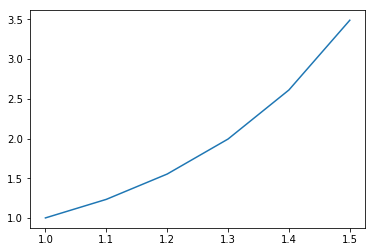

In [4]:
recursive(1.,1.,.1)

(b) The global truncation error for the formula above is:

$$ \text{error} = Y^{(5)}(c)\frac{h^5}{5!},$$
where $Y(x) = e^{x^2-1}$ is the exact solution of the differential equation $y'=2xy$.

Calculate the global truncation error for the method. Use $h=0.1$ and $c=1.5$. Note that $Y^{(5)}$ represents the fifth derivative of $Y(x)$. You must show work to receive credit.

latex for the fifth derivate of Y(x)

$$
Y(x) = e^{x^{2}-1}\\
Y^{(1)}(x) = (2x)e^{x^{2}-1}\\
Y^{(2)}(x) = (4x^{2}+2)e^{x^{2}-1}\\
Y^{(3)}(x) = (2x^{2} +3)4xe^{x^{2}-1}\\
Y^{(4)}(x) = (4x^{4}+12x^{2}+3)4e^{x^{2}-1}\\
Y^{(5)}(x) = (4x^{4}+20x^{2}+15)8xe^{x^{2}-1}\\
$$

The global truncation error for x=1.0 is 3.9000000000000006e-05
The global truncation error for x=1.1 is 6.114360135469855e-05
The global truncation error for x=1.2 is 9.706482110882044e-05
The global truncation error for x=1.3 is 0.0001560914182883183
The global truncation error for x=1.4 is 0.0002543608501682393
The global truncation error for x=1.5 is 0.0002543608501682393

[3.9000000000000006e-05, 6.114360135469855e-05, 9.706482110882044e-05, 0.0001560914182883183, 0.0002543608501682393, 0.0002543608501682393]


Text(0.5,1,'errorVals compared to xvals')

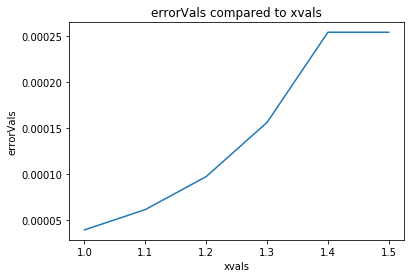

In [5]:
# present your work for part (b)
y = lambda x: (4.*x**4.+20.*x**2.+15.)*8.*x*np.exp((x**2.)-1.)
x=1.
error =0
xvals = []
errorVals = []
while x < 1.5:
    error = y(x)*1.5*.1**5./math.factorial(5)
    errorVals.append(error)
    xvals.append(x)
    print "The global truncation error for x="+ str(x)+" is "+str(error)
    x +=.1
xvals.append(x)
errorVals.append(error)
print "The global truncation error for x="+ str(x)+" is "+str(error)
print
print errorVals
plt.plot(xvals,errorVals)
plt.xlabel("xvals")
plt.ylabel("errorVals")
plt.title("errorVals compared to xvals")

(c) Compare the exact solution $Y(x) = e^{x^2-1}$ at $x=x_n$ for $n=0 \cdots 5$ to your computed solution from part (a) by plotting both on the same graph. Describe your observation(s).

In [6]:
def y():
    yvals = []
    x = 1.
    while x <1.6:
        y = np.exp((x**2.)-1.)
        x+=.1
        yvals.append(y)
    return yvals

In [7]:
def temp2(x,y,h):
    ##x = 1.
    ##y = 1.
    ##h = 0.1
    xvals = []
    yvals = []
    i = 0
    while x < 1.5:
        k1 = h*g(x,y)
        k2 = h*g(x+.5*h,y+.5*k1)
        k3 = h*g(x + .5*h, y + .5*k2)
        k4 = h*g(x+h,y+k3)
        yvals.append(y)
        xvals.append(x)
        y = y + 1./6.*(k1+2.*k2+2.*k3+k4)
        x +=.1
        i +=1
    xvals.append(x)
    yvals.append(y)
    return yvals

Text(0.5,1,'graph to compare recursive and funtion')

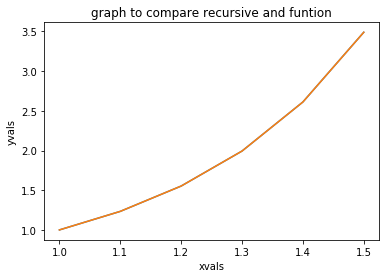

In [8]:
functionYvals = y()
xvals = [1.,1.1,1.2,1.3,1.4,1.5]
plt.plot(xvals,functionYvals)
recursiveYvals = temp2(1.,1.,.1)
plt.plot(xvals,recursiveYvals)
plt.xlabel("xvals")
plt.ylabel("yvals")
plt.title("graph to compare recursive and funtion")

They are exactly the same and overlap because the function is the exact solution to the recursive function we made just as you said. 

Problem 2 (20 pts):

Let $K$ be the maximum value of $\left \lvert f^{(4)}(x)\right\rvert$ on an interval $[a,b]$, then the error bound for Simpson method $E_S$ is:

$$E_S = \left\lvert \int_a^b f(x) \ dx - S_n  \right\rvert \leq \frac{(b-a)^5 K }{180 \ n^4}$$
Let $f(x) = \cos(x-x^2)$,

(a) Write a program to compute the maximum value of $\left \lvert f^{(4)}(x)\right\rvert$ on an interval $[0,1]$. Note that $f^{(4)}(x)$ represents the fourth derivative of the function $f(x)$.

Latex for finding the fourth derivative of f(x)

$$
f(x) = cos(x-x^{2})\\
f^{1}(x)=(2x-1)sin(x-x^{2})\\
f^{2}(x)=2sin(x-x^{2})-(1-2x)^{2}cos((x-1)x)\\
f^{3}(x)=(1-2x)(6cos((x-1)x)-(1-2x)^{2}sin((x-1)x))\\
f^{4}(x)=(16x^{4}-32x^{3}+24x^{2}-8x-11)cos((x-1)x)+12(1-2x)^{2}sin((x-1)x)\\
$$

In [9]:
#present your program for part 2(a)
y = lambda x: (16.*x**4.-32.*x**3.+24.*x**2.-8.*x-11.)*np.cos((x-1.)*x)+12.*(1.-2.*x)**2.*np.sin((x-1.)*x)
##y = lambda x: -24.*(x**2.)*np.sin(-1.*(x**2.)+x)+24.*x*np.sin(-1.*(x**2.)+x)-12.*np.cos(-1.*(x**2.)+x)+np.cos(-1.*(x**2.)+x)*(-2.*x+1.)**4.-6.*np.sin(-1.*(x**2.)+x)*(-2.*x+1.)**2.-6.*np.sin(-1.*(x**2.)+x)
##above is a check for correct solution 
xvals = np.linspace(0,1,25)
yvals = abs(y(xvals))
print yvals
print 
print "The Maximum value of the function is: ",
print yvals.max()

[11.         11.68745676 12.12011387 12.35058875 12.42717801 12.39335673
 12.28748507 12.14267084 11.98674258 11.84229303 11.72675977 11.65251583
 11.62694906 11.65251583 11.72675977 11.84229303 11.98674258 12.14267084
 12.28748507 12.39335673 12.42717801 12.35058875 12.12011387 11.68745676
 11.        ]

The Maximum value of the function is:  12.427178006554598


(b) How large must the value of $n$ be in the approximation $S_n$ of $\int_0^1 f(x) \ dx$ by Simpson's rule to ensure that the absolute error is less than $10^{-4}$?

In [10]:
#present your work for part 2(b)
def Es(n):
    temp = ((1.-0.)**5*12.4272)/(180.*n**4.)
    ##print abs(temp)
    return temp

In [11]:
xvals = np.linspace(2.8,2.9,10)
Es(xvals)
temp = 2.885
Es(temp)
print
print "n must be at least " + str(temp) +" to ensure that the absolute error is less that 10-4"


n must be at least 2.885 to ensure that the absolute error is less that 10-4


(c) Write a program to compute the integral using Simpson's method with the value of $n$ obtained in part (b).

In [12]:
def f(xvals):
    return np.cos(xvals-xvals**2)

In [13]:
#present your program for part 2(c)
def simpson_method(a,b,N,f):
    Nint = int(2*N) # This makes N even incase some one enters an odd value for N
    xvals = np.linspace(a,b,Nint+1)
    fvals = f(xvals)
    dx = float(b-a)/float(Nint)# cast as float to prevent integer division
    return dx/3.*(fvals[0] + fvals[Nint] + 2.*np.sum(fvals[2:Nint-1:2]) + 4.*np.sum(fvals[1:Nint:2]))

In [14]:
simpson_method(0,1,12.427178,f)

0.9833991543114319

In [15]:
simpson_method(0,1,2.885,f)

0.7851291321743123

(d) Write down the exact solution for $\int_0^1 f(x) \ dx$ (you don't need to show work for how you computed the exact solution).

Answer
.983399

(e) Compare the exact solution from part (d) to the computed solution from part (c). Does it agree with you estimates in part (b)?

Answer(e):The exact solution from part-d and the computed solution from part-c off by about (.2) this makes sense becaue 2.885 is just the min number to have for an error less than 10-4. (this was simply a benchmark) if you had wanted it to be 10-5 the n value would be higher. If you look above in part b I did the simpsons method with the max value and the error was zero they matched with the exact solution.  

Problem 3 (15 pts): Using the Secant Method, for $A>0$,

(a)(10 pts) Write a program which finds $A^{1/m}$ for any positive value $m$. Note, you need to choose a function $f(x)$ for the Secant Method whose root is $A^{1/m}$.


In [16]:
g = lambda A,m: A**(1./m) ## function to find m^th root of A 
A = 300.
m = 3.
g(A,m)
## this is without using secant method 
##for testing purposes 

6.694329500821695

In [17]:
#present your program for part 3(a)
def secant_method_mod(x0,x1,A,m,tol):
    f = lambda x,A,m: x**m - A
    f0 = f(x0,A,m)
    f1 = f(x1,A,m)
    x2 = x1 - f1*(x1-x0)/(f1-f0)
    
    iterCounter = 0
    while np.abs(f1) >= tol:
        x0 = x1
        x1 = x2
        f0 = f1
        f1 = f(x1,A,m)
        x2 = x1 - f1*(x1-x0)/(f1-f0)
        iterCounter+=1
    
    print "The "+str(m)+ " root of "+ str(A)+ " is "+str(x2)
    print
    print "iterations:"+str(iterCounter)
    print
    return x2,iterCounter

In [18]:
secant_method_mod(1.,6.,16.,2.,1e-5,)

The 2.0 root of 16.0 is 4.0

iterations:6



(4.0, 6)

In [19]:
secant_method_mod(1.,6.,300.,3.,1e-5)

The 3.0 root of 300.0 is 6.69432950082

iterations:6



(6.694329500821695, 6)

(b)(5 pts) How does your choice of $m$ effect how many iterations your program takes to converge for a given tolerance choice? Plots will help me to understand your thinking here.

In [20]:
#present your answer for part 3(b)
secant_method_mod(1.,6.,200.,3.,1e-5)

The 3.0 root of 200.0 is 5.84803547643

iterations:5



(5.848035476425732, 5)

In [21]:
secant_method_mod(1.,6.,200.,4.,1e-5)

The 4.0 root of 200.0 is 3.76060309309

iterations:11



(3.7606030930865564, 11)

In [22]:
secant_method_mod(1.,6.,200.,5.,1e-5)

The 5.0 root of 200.0 is 2.88539981181

iterations:95



(2.8853998118146467, 95)

In [23]:
secant_method_mod(1.,6.,200.,3.,1e-1)

The 3.0 root of 200.0 is 5.8480352569

iterations:3



(5.848035256900462, 3)

In [24]:
secant_method_mod(1.,6.,200.,4.,1e-1)

The 4.0 root of 200.0 is 3.76060307531

iterations:10



(3.7606030753137722, 10)

In [25]:
secant_method_mod(1.,6.,200.,5.,1e-1)

The 5.0 root of 200.0 is 2.88539979453

iterations:94



(2.8853997945273373, 94)

Answer 3b) 
For a given tolerance as your choice of m increases it will cause more an increase in the amount of iterations. This is shown by the above examples with a tolerance choice of 1e-5 and increasing m from [3-5] also increasing your tolerance(in our case from 1e-5 to 1e-1 leads to an decrease of iterations but also to a less accurate answer)

The 1.0 root of 200.0 is 200.0

iterations:1

The 2.0 root of 200.0 is 14.1421356237

iterations:7

The 3.0 root of 200.0 is 5.84803547643

iterations:5

The 4.0 root of 200.0 is 3.76060309309

iterations:11

The 5.0 root of 200.0 is 2.88539981181

iterations:95



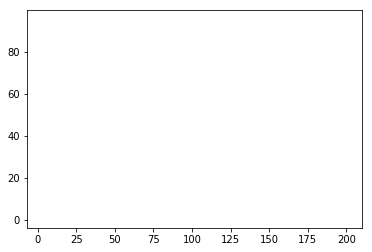

In [26]:
#make a graph here
mvals = [1.,2.,3.,4.,5.]
for i in mvals:
    xvals,yvals = secant_method_mod(1.,6.,200.,i,1e-5)
    plt.plot(xvals,yvals)

Problem 4 (15 pts): So, associated with Chebyshev spacing or the Chebyshev nodes are Chebyshev polynomials, which for $-1\leq x \leq 1$ are defined to be $T_{n}(x)$ where

$$
T_{n}(x) = \cos\left(n \cos^{-1}(x) \right), ~ n=0, 1, ...
$$
We see that

$$
T_{0}(x) = 1, ~ T_{1}(x) = x
$$
Now:

(a) (3 pts) Letting $\theta = \cos^{-1}(x)$, so that $T_{2}(x)=\cos(2\theta)$ and $T_{1}(x) = x = \cos(\theta)$, and using

$$
\cos(2\theta) = \cos^{2}(\theta) - \sin^{2}(\theta), 
$$
and

$$
\sin^{2}(\theta) = 1 - \cos^{2}(\theta), 
$$
show that

$$
T_{2}(x) = 2x^{2} - 1 
$$

Answer 4a)

$$
T_{2}(x)=cos(2cos^{-1}(x))\\
= cos(2\theta)\\
=cos^{2}(\theta)-sin^{2}(\theta)\\
=cos^{2}(\theta)-(1-cos^{2}(\theta))\\
=cos^{2}(\theta)-1+cos^{2}(\theta)\\
=2cos^{2}(\theta)-1\\
=2(cos(\theta))^{2}-1\\
=2(x)^{2}-1\\
=2x^{2}-1
$$

(b) (3 pts) Letting $\theta = \cos^{-1}(x)$, so that $T_{n}(x)=\cos(n\theta)$, and using

$$\begin{align*}
T_{n+1}(x) = \cos((n+1)\theta) =  \cos(n\theta)\cos(\theta) - \sin(n\theta)\sin(\theta)\\
 \\
\sin(n\theta) =  \sin((n-1)\theta)\cos(\theta) + \cos((n-1)\theta)\sin(\theta)\\
 \\
\sin((n-1)\theta)\sin(\theta) = \cos((n-1)\theta)\cos(\theta) - \cos(n\theta) 
\end{align*}$$
show that

$$
T_{n+1}(x) = 2xT_{n}(x) - T_{n-1}(x)
$$
Using this and a brief induction argument, show that $T_{n}(x)$ is an $n^{th}$-order polynomial.

Answer 4b)

$$
T_{n+1} = cos(n\theta)cos(\theta) - [sin((n+1)\theta)cos(\theta)+cos((n+1)\theta)sin(\theta)](sin(\theta))\\
=cos(n\theta)cos(\theta) -sin((n+1)\theta)sin(\theta)cos(\theta)+cos((n+1)\theta)sin^{2}(\theta)\\
=cos(n\theta)cos(\theta) - cos(\theta)[cos((n+1)\theta)cos(\theta)-cos(n\theta)]-cos((n-1)\theta)(1-cos^{2}(\theta))\\
=cos(n\theta)cos(\theta) -cos((n-1)\theta)cos^{2}(\theta)+cos(n\theta)cos(\theta)-cos((n-1)\theta)+cos((n-1)\theta)cos^{2}(\theta)\\
=2cos(n\theta)cos(\theta)-cos((n-1)\theta)\\
=2xT_{n}(x)-T_{n-1}(x)
$$

(c) (2 pts) Show that the $n+1$ roots of $T_{n+1}(x)$ are given by the Chebyshev nodes

$$
x_{j} = \cos\left(\pi\frac{2j+1}{2n+2} \right),  ~ j=0,\cdots, n
$$
Thus, if we use the recurence relation above and the Fundamental Theorem of Algebra, we see that

$$
T_{n+1}(x) = 2^{n}\prod_{j=0}^{n}\left(x - x_{j}\right).
$$
Therefore, when we write the Lagrange Interpolating Polynomial, $P_{n}(x)$, which interpolates the data $\left\{x_{j}, f_{j}\right\}_{j=0}^{n}$, we have that

$$\begin{align}
P_{n}(x) =  \sum_{j=0}^{n} f_{j}L_{j}(x)\\
=  \frac{1}{2^{n}}\sum_{j=0}^{n}\frac{f_{j}}{c_{j}}\frac{T_{n+1}(x)}{x-x_{j}}, ~ c_{j} = \prod_{l=0,l\neq j}^{n}\left(x_{j}-x_{l}\right)
\end{align}$$
From this then, we can build an approximation to differentiation using Chebyshev nodes by finding

$$
\left.\frac{dP_{n}}{dx}\right|_{x=x_{k}} = \frac{1}{2^{n}}\sum_{j=0}^{n}\frac{f_{j}}{c_{j}}\left.\frac{d}{dx}\left(\frac{T_{n+1}(x)}{x-x_{j}}\right)\right|_{x=x_{k}}
$$
Using some effort (which you do not need to recreate), we then have that

$$
\left.\frac{dP_{n}}{dx}\right|_{x=x_{k}} = \frac{(n+1)(-1)^{k}}{2^{n}\tilde{x}_{k}}\sum_{j=0}^{n}\frac{d_{kj}}{c_{j}}f_{j}, 
$$
where

$$
\tilde{x}_{k} = \sin\left(\pi \frac{2k+1}{2n+2} \right), ~ c_{j} = \prod_{l=0,l\neq j}^{n}\left(x_{j}-x_{l}\right).
$$
and

$$
d_{kj} = \left\{\begin{array}{rl}
\frac{x_{k}}{2(1-x_{k}^{2})}  j = k \\
\frac{1}{x_{k}-x_{j}}  j\neq k
\end{array}
\right.
$$
Now, for given data $\left\{x_{j}, f_{j} \right\}_{j=0}^{n}$

In [27]:
def lfun(xvals,jj,x):
    lval = np.ones(x.size)
    # Insert code here
    n = xvals.size
    for l in xrange(0,n):
        if l != jj:
            lval *= (x-xvals[l])/float(xvals[jj]-xvals[l])  

    return lval

In [28]:
def lagran_interp(xvals,fvals,x):
    n = fvals.size
    # Insert code here 
    ipoly = np.zeros(x.size)
    for jj in xrange(0,n):
        ipoly += fvals[jj]*lfun(xvals,jj,x)
   
    return ipoly

In [29]:
def ftrue(x,n):
    return np.cos(n*math.acos(x))

C:\Users\steve\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


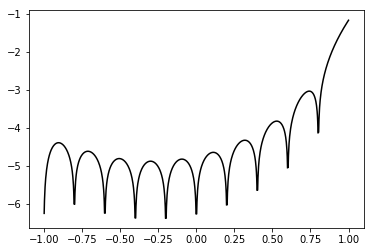

In [30]:
xinterp = np.linspace(-1.,1.,int(1e3))
ftrue = 1./(1.+xinterp**2.)
xvals = xinterp[::100]
fvals = ftrue[::100]
finterp = lagran_interp(xvals,fvals,xinterp)
plt.plot(xinterp,np.log10(np.abs(ftrue-finterp)),ls='-',color='k')

C:\Users\steve\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


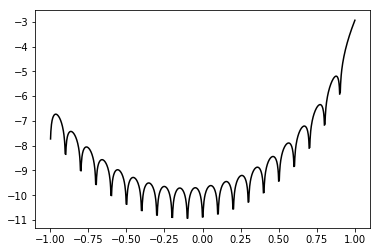

In [31]:
xvals = xinterp[::50]
fvals = ftrue[::50]
finterp = lagran_interp(xvals,fvals,xinterp)
plt.plot(xinterp,np.log10(np.abs(ftrue-finterp)),ls='-',color='k')

C:\Users\steve\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


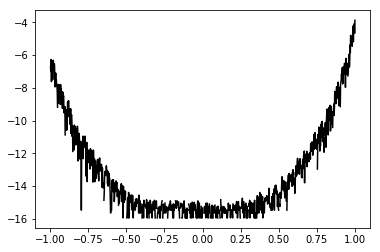

In [32]:
xvals = xinterp[::25]
fvals = ftrue[::25]
 
finterp = lagran_interp(xvals,fvals,xinterp)
plt.plot(xinterp,np.log10(np.abs(ftrue-finterp)),ls='-',color='k')

C:\Users\steve\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


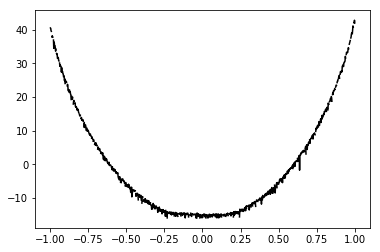

In [33]:
xvals = xinterp[::5]
fvals = ftrue[::5]
finterp = lagran_interp(xvals,fvals,xinterp)
plt.plot(xinterp,np.log10(np.abs(ftrue-finterp)),ls='-',color='k')

C:\Users\steve\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


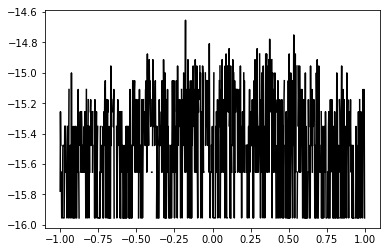

In [34]:
ncheb = 40
xcheb=np.zeros(ncheb+1)
for jj in xrange(0,ncheb+1):
    xcheb[jj] = np.cos((2.*jj+1.)/(2.*ncheb+2.)*np.pi)
fcheb = 1./(1.+xcheb**2.)
finterp = lagran_interp(xcheb,fcheb,xinterp)
plt.plot(xinterp,np.log10(np.abs(ftrue-finterp)),ls='-',color='k')

Text(0,0.5,'$P_{n}(x)$')

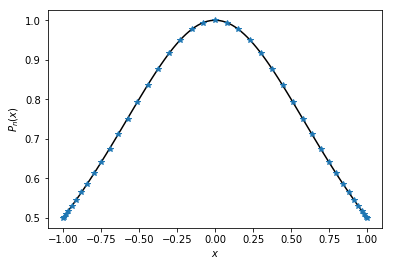

In [35]:
xinterp = np.linspace(-1.,1.,int(1e2))
ivals = lagran_interp(xcheb,fcheb,xinterp)
plt.plot(xinterp,ivals,color='k')
plt.plot(xcheb,fcheb,'*')
plt.xlabel('$x$')
plt.ylabel('$P_{n}(x)$')

(d) (4 pts) Write a program which implements the above approximation for $f'(x)$ over the Chebyshev nodes. Note, you may want to try to store the necessary information in a matrix and then use matrix-vector multiplication to compute your result. Otherwise, just use nested for loops.